## Boosting: gradient boosting


In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

In this task you are asked to implement a boosting algorithm, and compare speed of
different popular boosting libraries.

Let's generate a toy dataset for classification.

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)

Your task:
1. Implement adaboost (or gradient boosting) algorithms with **logistic loss**
and labels $y\in \{-1, +1\}$;


2. **Plot the decision boundary** on a $2$-d grid; 



3. Estimate the accuracy **score** on the test dataset, as well as other classification metrics

Будем обучать ансамбль неглубоких деревьев, чтобы минимизировать ошибку суммы их предсказаний:

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
class GradientBoost():
    def __init__(self, N):
        self.weights = []
        self.models = []
        self.N = N


    def fit(self, X, y):
        y_ = np.array(y)

        for i in range(self.N):
            regr = DecisionTreeRegressor(max_depth=3)
            regr.fit(X, y_)
            self.models.append(regr)
            self.weights.append(0.9)
            y_ = y - self.predict(X)

        return self


    def predict(self, X):
        r = np.zeros(X.shape[0])

        for i in range(len(self.models)):
            r += self.models[i].predict(X) * self.weights[i]

        return r > 0.5

In [5]:
clf = GradientBoost(100)
clf.fit(X_train, y_train)

In [8]:
from mlxtend.plotting import plot_decision_regions

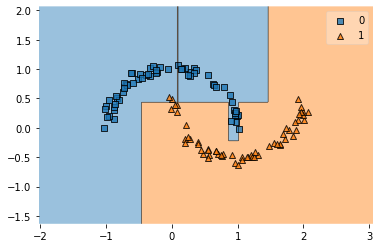

In [9]:
plot_decision_regions(X_test, y_test, clf=clf)
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
accuracy_score(y_test, clf.predict(X_test))

0.9666666666666667

In [12]:
precision_score(y_test, clf.predict(X_test))

0.9655172413793104

In [13]:
recall_score(y_test, clf.predict(X_test))

0.9655172413793104

In [14]:
f1_score(y_test, clf.predict(X_test))

0.9655172413793104

Сравним со стандартным градиентным бустингом из sklearn:

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

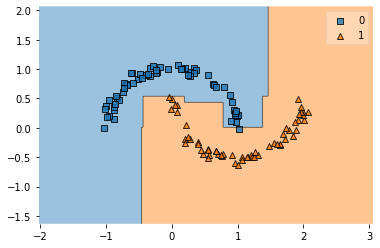

In [17]:
plot_decision_regions(X_test, y_test, clf=clf)
plt.show()

In [18]:
accuracy_score(y_test, clf.predict(X_test))

0.9916666666666667

In [19]:
precision_score(y_test, clf.predict(X_test))

0.9830508474576272

In [20]:
recall_score(y_test, clf.predict(X_test))

1.0

In [21]:
f1_score(y_test, clf.predict(X_test))

0.9914529914529915

Сравним с одним неглубоким деревом решений из sklearn:

In [22]:
clf = DecisionTreeRegressor(max_depth=3)

In [23]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [25]:
accuracy_score(y_test, clf.predict(X_test) > 0.5)

0.8916666666666667

In [26]:
precision_score(y_test, clf.predict(X_test) > 0.5)

0.835820895522388

In [27]:
recall_score(y_test, clf.predict(X_test) > 0.5)

0.9655172413793104

In [28]:
f1_score(y_test, clf.predict(X_test) > 0.5)

0.896